In [1]:
%load_ext autoreload
%autoreload 2

# Mean Average Precision Report

This notebooks provides an overview for using and understanding the mean average precision report check.

**Structure:**

- [What is the purpose of the check?](#purpose)
- [Object Detection](#obj_det)
    - [Generate data & model](#generate_o)
    - [Defining the Prediction Formatter](#pred_format_o)
    - [Run the check](#run_check_o)
    

## What is the purpose of the check? <a name='purpose'></a>

The mean average precision report evaluates the mean average precision metric on the given model and data. 
The check only works on object detection as it computes the value with the IoU and Area size.

### Imports

In [2]:
from deepchecks.vision.base import VisionData
from deepchecks.vision.checks.performance import MeanAveragePrecisionReport

## Object Detection Class Performance  <a name='obj_det'></a>

For object detection tasks - the default metric that is being calculated it the Average Precision. The definition of the Average Precision is identical to how the COCO dataset defined it - mean of the average precision per class, over the range [0.5, 0.95, 0.05] of IoU thresholds.

In [3]:
import numpy as np
from deepchecks.vision.utils.detection_formatters import DetectionLabelFormatter, DetectionPredictionFormatter
from deepchecks.vision.datasets.detection import coco

### Generate Data and Model <a name='generate_o'></a>

We generate a sample dataset of 128 images from the [COCO dataset](https://cocodataset.org/#home), and using the [YOLOv5 model](https://github.com/ultralytics/yolov5).

For the label formatter - our dataset returns exactly the accepted format, so our formatting function is the simple `lambda x: x` function.

In [4]:
yolo = coco.load_model(pretrained=True)

coco_test_loader = coco.load_dataset(train=False)

test_ds = VisionData(coco_test_loader, label_transformer=DetectionLabelFormatter(coco.yolo_label_formatter), num_classes=80)

### Defining the prediction formatter <a name='pred_format_o'></a>
The COCO module implemented in deepchecks already contains a transformation function to convert the yolo detection to the correct format of [x, y, w, h, confidence, class_id].

In [5]:
from deepchecks.vision.utils.detection_formatters import DetectionPredictionFormatter

det_formatter = DetectionPredictionFormatter(coco.yolo_prediction_formatter)

### Run the check <a name='run_check_o'></a>

/Users/jonthanliberman/Documents/MLChecks/test1/lib/python3.8/site-packages/torch/autocast_mode.py:141: UserWarning:

User provided device_type of 'cuda', but CUDA is not available. Disabling

/Users/jonthanliberman/Documents/MLChecks/test1/lib/python3.8/site-packages/torch/autocast_mode.py:141: UserWarning:

User provided device_type of 'cuda', but CUDA is not available. Disabling

/Users/jonthanliberman/Documents/MLChecks/test1/lib/python3.8/site-packages/torch/autocast_mode.py:141: UserWarning:

User provided device_type of 'cuda', but CUDA is not available. Disabling



,Area size,mAP(COCO challenge) (%),AP@.50 (%),AP@.75 (%)
0,All,0.36,0.50,0.38
1,Small (area<32^2),0.19,0.29,0.19
2,Medium (32^2<area<96^2),0.37,0.57,0.37
3,Large (area<96^2),0.48,0.58,0.53


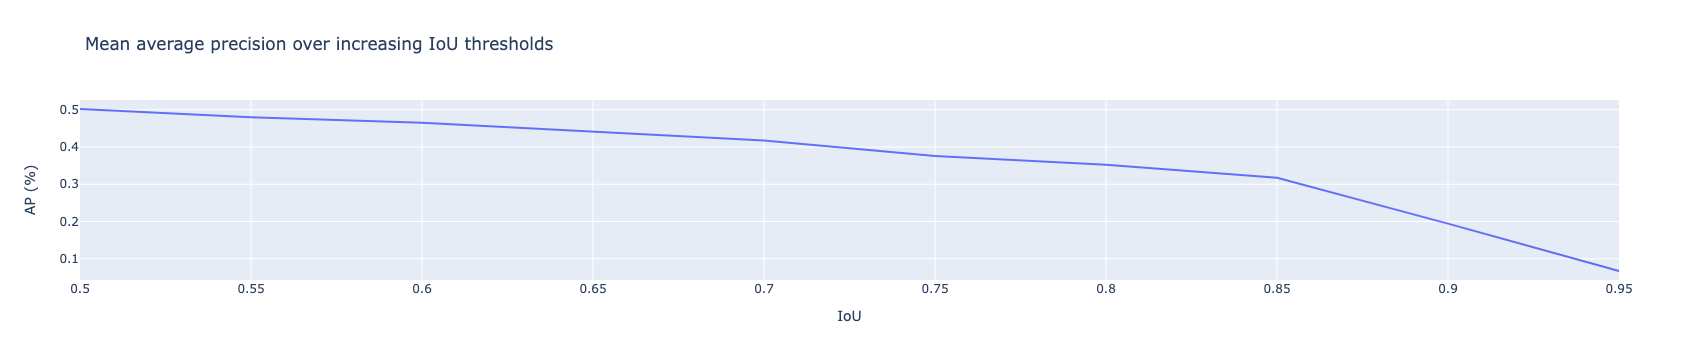

In [33]:
check = MeanAveragePrecisionReport()
check.run(test_ds, yolo, prediction_formatter=det_formatter)